# MONAN_POST

Neste notebook é apresentado um exemplo de como converter arquivos binários georeferenciados que podem ser abertos com o GrADS para o formato Zarr. Os arquivos binário são abertos por meio dos seus arquivos descritores CTL utilizando o `xgrads`. Os arquivos Zarr são utilizados como fontes de dados de um catáogo carregado com o `intake`.

Nas células a seguir, observe que a instrução `%%time` é utilizada para contabilizar o tempo de execução do comando.

In [1]:
import os
import xarray as xr
from xgrads import CtlDescriptor
from xgrads import open_CtlDataset
import numpy as np
#from joblib import Parallel, delayed
import zarr

In [2]:
# Listas de atributos (regiões, experimentos, estatísticas e testes realizados) utilizados no loop para a escrita dos arquivos
# Para reduzir o tempo de execução deste notebook, note que alguns atributos foram removidos das listas

Regs = ['gl']#, 'hn', 'tr', 'hs', 'as']
Exps = ['DTC', 'BAMH']#, 'BAMH0']
Stats = ['VIES']#, 'RMSE', 'MEAN']
Tests = ['T1']#, 'T2', 'T3']

bpath = '/extra2/SCANTEC_XC50/SCANTEC-2.1.0/dataout/periodo'

In [3]:
%%time

# Escrita convencional, formato zarr (1 arquivo por vez)
# No loop, observe que o nome dos arquivos CTL é formato e eles são abertos e escritos no formato zarr

compressor = zarr.Blosc(cname="zstd", clevel=3, shuffle=2)
encoding = {
    'zgeo250': {"compressor": compressor},
    'pslc000': {"compressor": compressor},
    'uvel500': {"compressor": compressor},
    'umes500': {"compressor": compressor},
    'zgeo500': {"compressor": compressor},
    'vvel500': {"compressor": compressor},
    'vtmp850': {"compressor": compressor},
    'uvel850': {"compressor": compressor},
    'vvel850': {"compressor": compressor},
    'temp850': {"compressor": compressor},
    'temp250': {"compressor": compressor},
    'umes925': {"compressor": compressor},
    'vtmp925': {"compressor": compressor},
    'temp500': {"compressor": compressor},
    'vtmp500': {"compressor": compressor},
    'umes850': {"compressor": compressor},
    'uvel250': {"compressor": compressor},
    'vvel250': {"compressor": compressor},
    'zgeo850': {"compressor": compressor},
}

for reg in Regs:
    for exp in Exps:
        for stat in Stats:
            for test in Tests:
                print(reg, exp, stat, test)
                filein = str(stat) + str(exp) + '_20230216002023030300F.ctl'
                fnamein = os.path.join(bpath, test, reg, filein)
                fileout = str(stat) + str(exp) + '_20230216002023030300FC.zarr'
                fnameout = os.path.join(test, reg, fileout)
                dset = open_CtlDataset(fnamein).to_zarr(fnameout, mode='w', consolidated=True, encoding=encoding)

gl DTC VIES T1
gl BAMH VIES T1
CPU times: user 9.18 s, sys: 2.08 s, total: 11.3 s
Wall time: 1min 27s


In [7]:
# Criação de uma estrutura de dados georeferenciada a partir do arquivo zarr criado

ds = xr.open_dataset('/home/carlos/Documents/GitHub/monan_post/notebooks/T1/gl/VIESDTC_20230216002023030300FC.zarr', engine='zarr', chunks='auto')

In [8]:
# Verificação da estutura de dados criada

ds

<xarray.Dataset>
Dimensions:  (lat: 401, lon: 901, time: 12)
Coordinates:
  * lat      (lat) float32 -80.0 -79.6 -79.2 -78.8 -78.4 ... 78.8 79.2 79.6 80.0
  * lon      (lon) float32 0.0 0.4 0.8 1.2 1.6 ... 358.4 358.8 359.2 359.6 360.0
  * time     (time) datetime64[ns] 2023-02-16 2023-02-17 ... 2023-02-27
Data variables: (12/19)
    pslc000  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    temp250  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    temp500  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    temp850  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    umes500  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    umes850  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    ...       ...
    vvel250  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    vvel500  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    vvel850  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    zgeo250  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    zgeo500  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
    zgeo850  (time, lat, lon) float32 dask.array<chunksize=(12, 401, 901), meta=np.ndarray>
Attributes:
    comment:  virtual temperatura @ 925 hpa [k]
    pdef:     None
    storage:  99
    title:    
    undef:    -999.9

CPU times: user 78 ms, sys: 16.4 ms, total: 94.4 ms
Wall time: 93.2 ms


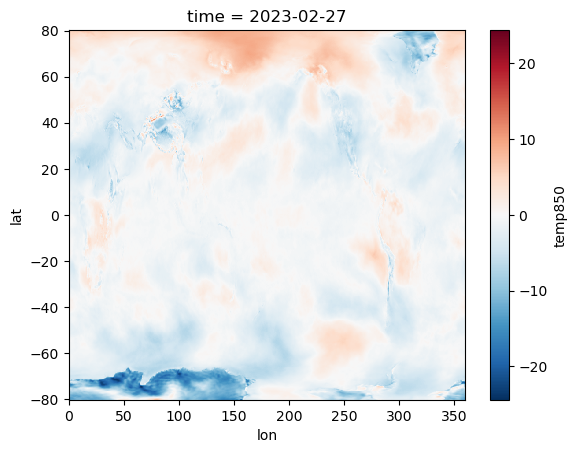

In [9]:
%%time

# Plotagem da variável 'temp850' no último tempo do dataset (estrutura de dados armazenada no objeto ds)

ds['temp850'].isel(time=-1).plot()